In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


In [2]:
symbol = 'AAPL'
data = yf.download(tickers=symbol, period='1d', interval='1m')
display(data.tail())

C:\Users\ROG\AppData\Local\Temp\ipykernel_24996\2515064807.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers=symbol, period='1d', interval='1m')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Datetime,,,,,
2025-11-24 20:55:00+00:00,276.190002,276.429993,275.570007,275.880005,337877
2025-11-24 20:56:00+00:00,275.899994,276.179993,275.799988,276.179993,210112
2025-11-24 20:57:00+00:00,275.885010,275.910004,275.640015,275.910004,250350
2025-11-24 20:58:00+00:00,275.820007,276.000000,275.779999,275.880005,12639256
2025-11-24 20:59:00+00:00,275.980011,276.079987,275.739990,275.820007,0


In [3]:
data['Next_Close'] = data['Close'].shift(-1)
data.dropna(inplace=True)
X = data[['Close']].values[:-1]
y = data['Next_Close'].values[:-1]


In [4]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [5]:
latest_close = data['Close'].values[-1].reshape(-1, 1)
predicted_next = model.predict(latest_close)
print(f"Latest Close: {latest_close[0][0]}, Predicted Next Close: {predicted_next[0]}")

Latest Close: 275.82000732421875, Predicted Next Close: 275.81682009895025


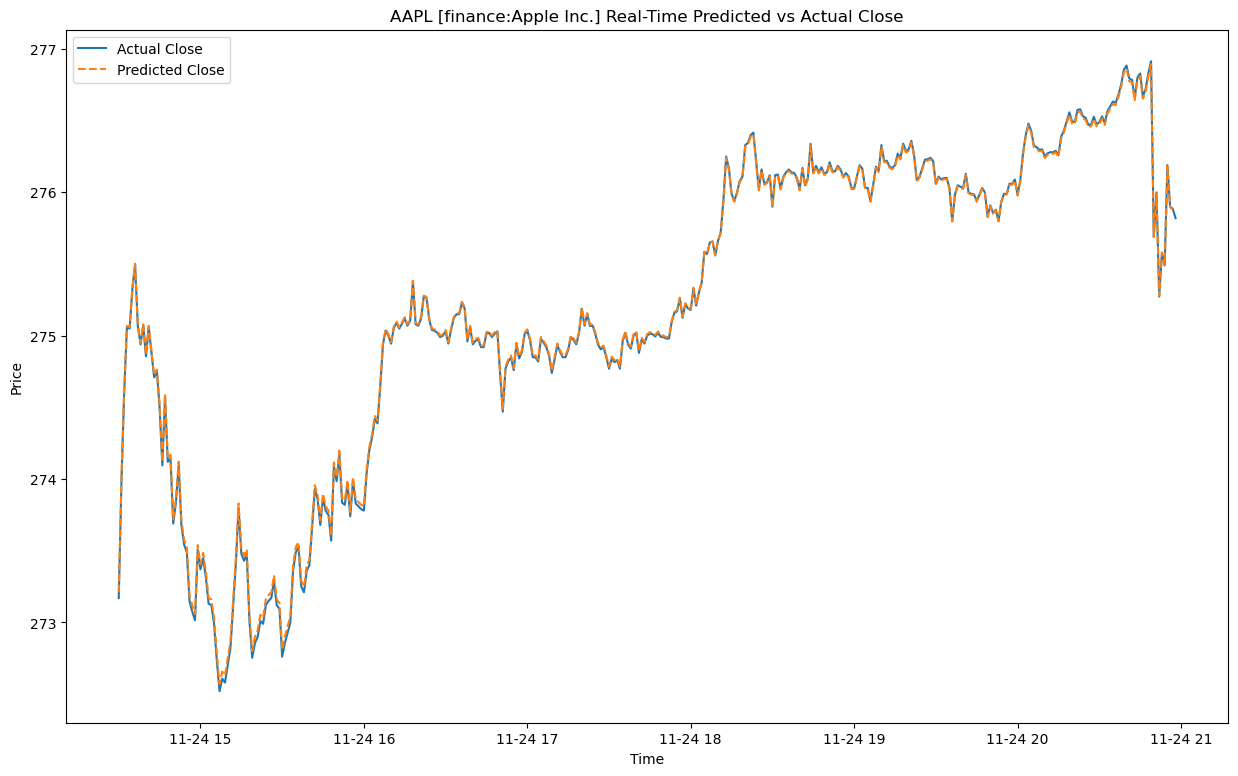

In [7]:
plt.figure(figsize=(15,9))
plt.plot(data.index, data['Close'], label='Actual Close')
plt.plot(data.index[:-1], model.predict(X), label='Predicted Close', linestyle='--')
plt.legend()
plt.title(f'{symbol} [finance:Apple Inc.] Real-Time Predicted vs Actual Close')
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()
